In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [197]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_match = pd.read_csv('training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv')
data_ipl_2k23_player_team=pd.read_csv('training_dataset/DataSet/Ipl_2023 _cricketers - Players.csv')

In [198]:
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [199]:
data_ipl_2k23_player_team.head()

,player,Team
0,YBK Jaiswal,RR
1,JC Buttler,RR
2,SV Samson,RR
3,D Padikkal,RR
4,SO Hetmyer,RR


In [200]:
data_match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [201]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

## Ball Dataset Preprocessing

### Data Cleaning

In [202]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [203]:
data_ball.shape

(225954, 17)

In [204]:
data_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [205]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [206]:
data_ball = data_ball.drop(['extra_type', 'kind', 'fielders_involved', 'batsman_run', 'extras_run', 'isWicketDelivery'], axis = 1)

In [207]:
data_ball.isnull().sum()

ID                   0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
total_run            0
non_boundary         0
player_out      214803
BattingTeam          0
dtype: int64

In [208]:
data_ball['player_out'] = data_ball['player_out'].replace([np.nan], ['Not out'])

In [209]:
data_ball.shape

(225954, 11)

In [210]:
data_ball.head(40)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals


In [211]:
ID = list(data_ball['ID'].unique())

In [212]:
data_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            225954 non-null  int64 
 1   innings       225954 non-null  int64 
 2   overs         225954 non-null  int64 
 3   ballnumber    225954 non-null  int64 
 4   batter        225954 non-null  object
 5   bowler        225954 non-null  object
 6   non-striker   225954 non-null  object
 7   total_run     225954 non-null  int64 
 8   non_boundary  225954 non-null  int64 
 9   player_out    225954 non-null  object
 10  BattingTeam   225954 non-null  object
dtypes: int64(6), object(5)
memory usage: 19.0+ MB


In [213]:
data_ball['total_run'].value_counts()

1    93861
0    79253
4    25828
2    15065
6    10603
3      836
5      444
7       64
Name: total_run, dtype: int64

In [214]:
#data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 5].index)
#data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 3].index)
data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 7].index)

In [215]:
data_ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals


In [216]:
data_ball.isna().sum()

ID              0
innings         0
overs           0
ballnumber      0
batter          0
bowler          0
non-striker     0
total_run       0
non_boundary    0
player_out      0
BattingTeam     0
dtype: int64

## Match Dataset Preprocessing

In [217]:
winning_team=data_match[['ID','WinningTeam']]

In [218]:
winning_team.head()

,ID,WinningTeam
0,1312200,Gujarat Titans
1,1312199,Rajasthan Royals
2,1312198,Royal Challengers Bangalore
3,1312197,Gujarat Titans
4,1304116,Punjab Kings


## Ball dataset with winning team

In [219]:
combined_data = pd.merge(data_ball, winning_team, on = 'ID')

In [220]:
combined_data.isnull().sum()

ID                0
innings           0
overs             0
ballnumber        0
batter            0
bowler            0
non-striker       0
total_run         0
non_boundary      0
player_out        0
BattingTeam       0
WinningTeam     372
dtype: int64

In [221]:
combined_data = combined_data.dropna()

In [222]:
combined_data.head(30)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam,WinningTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals,Gujarat Titans
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans


## Players data preprocessing

In [223]:
batter_bowler_run_data = combined_data[['batter', 'bowler', 'total_run']]

In [224]:
batter_bowler_run_data.head()

,batter,bowler,total_run
0,YBK Jaiswal,Mohammed Shami,0
1,YBK Jaiswal,Mohammed Shami,1
2,JC Buttler,Mohammed Shami,1
3,YBK Jaiswal,Mohammed Shami,0
4,YBK Jaiswal,Mohammed Shami,0


In [225]:
batter_bowler_run_data.shape

(225518, 3)

In [226]:
X = batter_bowler_run_data.iloc[:, :-1]
y = batter_bowler_run_data.iloc[:, -1]

In [227]:
import seaborn as sns

<AxesSubplot: xlabel='total_run', ylabel='count'>

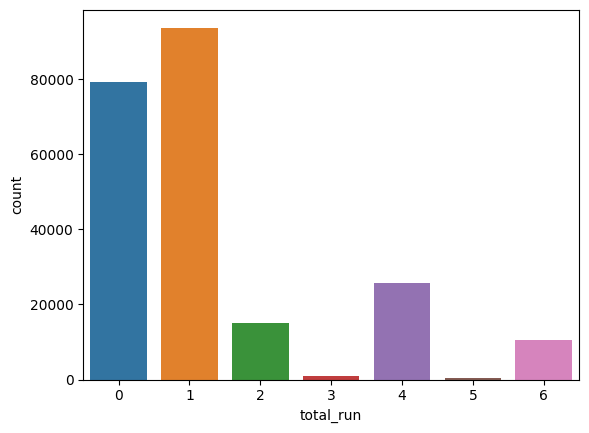

In [228]:
sns.countplot(x = y)

In [229]:
X['batter'].nunique()

605

In [230]:
X['bowler'].nunique()

471

In [231]:
from sklearn.preprocessing import LabelEncoder

In [232]:
# Encoding
le = LabelEncoder()
X['batter_encoded'] = le.fit_transform(X['batter'])
X['bowler_encoded'] = le.fit_transform(X['bowler'])

In [234]:
X.head()

,batter,bowler,batter_encoded,bowler_encoded
0,YBK Jaiswal,Mohammed Shami,596,275
1,YBK Jaiswal,Mohammed Shami,596,275
2,JC Buttler,Mohammed Shami,219,275
3,YBK Jaiswal,Mohammed Shami,596,275
4,YBK Jaiswal,Mohammed Shami,596,275


In [250]:
encoding=dict(enumerate(list(set(X.batter.unique().tolist()+X.bowler.unique().tolist()))))
encoding = {value: key for key, value in encoding.items()}
encoding

{'Ankit Sharma': 0,
 'KK Cooper': 1,
 'DR Shorey': 2,
 'SM Pollock': 3,
 'BE Hendricks': 4,
 'S Ladda': 5,
 'Sunny Singh': 6,
 'RR Powar': 7,
 'RR Bhatkal': 8,
 'IK Pathan': 9,
 'Anirudh Singh': 10,
 'CJ Ferguson': 11,
 'DAJ Bracewell': 12,
 'SM Curran': 13,
 'CV Varun': 14,
 'TR Birt': 15,
 'S Tyagi': 16,
 'MN van Wyk': 17,
 'V Kohli': 18,
 'P Simran Singh': 19,
 'KJ Abbott': 20,
 'PC Valthaty': 21,
 'JEC Franklin': 22,
 'DR Martyn': 23,
 'FH Edwards': 24,
 'K Khejroliya': 25,
 'Aman Hakim Khan': 26,
 'Mohammad Ashraful': 27,
 'P Kumar': 28,
 'SC Ganguly': 29,
 'Imran Tahir': 30,
 'UBT Chand': 31,
 'DS Lehmann': 32,
 'Z Khan': 33,
 'DJ Willey': 34,
 'D Padikkal': 35,
 'H Klaasen': 36,
 'Kartik Tyagi': 37,
 'M Vohra': 38,
 'LI Meriwala': 39,
 'RD Chahar': 40,
 'Akash Singh': 41,
 'Shahbaz Ahmed': 42,
 'J Theron': 43,
 'RS Bopara': 44,
 'JL Denly': 45,
 'AJ Turner': 46,
 'AA Noffke': 47,
 'AS Yadav': 48,
 'DJ Jacobs': 49,
 'B Sai Sudharsan': 50,
 'P Awana': 51,
 'Shoaib Ahmed': 52,
 'DJ

In [235]:
X[X.bowler=='Harbhajan Singh']

,batter,bowler,batter_encoded,bowler_encoded
29880,V Kohli,Harbhajan Singh,569,149
29881,V Kohli,Harbhajan Singh,569,149
29882,V Kohli,Harbhajan Singh,569,149
29883,V Kohli,Harbhajan Singh,569,149
29884,D Padikkal,Harbhajan Singh,124,149
...,...,...,...,...
225188,MV Boucher,Harbhajan Singh,342,149
225189,MV Boucher,Harbhajan Singh,342,149
225190,JH Kallis,Harbhajan Singh,226,149
225191,B Akhil,Harbhajan Singh,76,149


In [236]:
X[X.batter=='Harbhajan Singh']

,batter,bowler,batter_encoded,bowler_encoded
30128,Harbhajan Singh,HV Patel,195,148
30130,Harbhajan Singh,HV Patel,195,148
31335,Harbhajan Singh,TA Boult,195,431
31336,Harbhajan Singh,TA Boult,195,431
50760,Harbhajan Singh,JJ Bumrah,195,177
...,...,...,...,...
224255,Harbhajan Singh,M Muralitharan,195,242
224257,Harbhajan Singh,M Muralitharan,195,242
224258,Harbhajan Singh,M Muralitharan,195,242
225069,Harbhajan Singh,Z Khan,195,470


In [39]:
X.shape

(225518, 4)

In [40]:
X_le = X[['batter_encoded', 'bowler_encoded']]

In [41]:
X_le.head()

,batter_encoded,bowler_encoded
0,596,275
1,596,275
2,219,275
3,596,275
4,596,275


In [42]:
print(X_le.shape)
print(y.shape)

(225518, 2)
(225518,)


### Resampled players data using the combination of Undersampling and Oversampling

In [43]:
from imblearn.combine import SMOTETomek

sampler = SMOTETomek(random_state=42)

X_resampled, y_resampled = sampler.fit_resample(X_le, y)

### Test and train split on resampled players data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

## Players Data Modelling

### Decision tree classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.33      0.32      0.33     18593
           1       0.33      0.25      0.28     18880
           2       0.44      0.48      0.46     18553
           3       0.74      0.79      0.76     18753
           4       0.40      0.40      0.40     18912
           5       0.78      0.81      0.80     18721
           6       0.49      0.54      0.51     18605

    accuracy                           0.51    131017
   macro avg       0.50      0.51      0.51    131017
weighted avg       0.50      0.51      0.51    131017



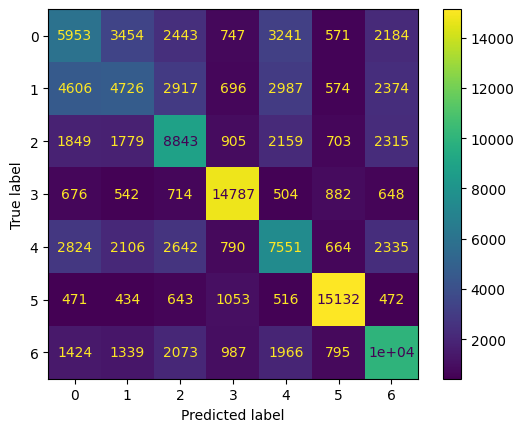

In [47]:
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train, y_train)

y_pred = dtc_clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [48]:
param_dist = {
    'max_depth': [3, 13, 23, 33],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(dtc_clf,
                                   param_distributions = param_dist,
                                   n_iter = 500,
                                   cv = 5,
                                   n_jobs = -1
)

random_search.fit(X_train, y_train)

KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.34      0.32      0.33     18827
           1       0.32      0.24      0.28     18756
           2       0.43      0.47      0.45     18636
           3       0.74      0.79      0.76     18811
           4       0.39      0.39      0.39     18749
           5       0.78      0.81      0.79     18673
           6       0.49      0.53      0.51     18563

    accuracy                           0.51    131015
   macro avg       0.50      0.51      0.50    131015
weighted avg       0.50      0.51      0.50    131015



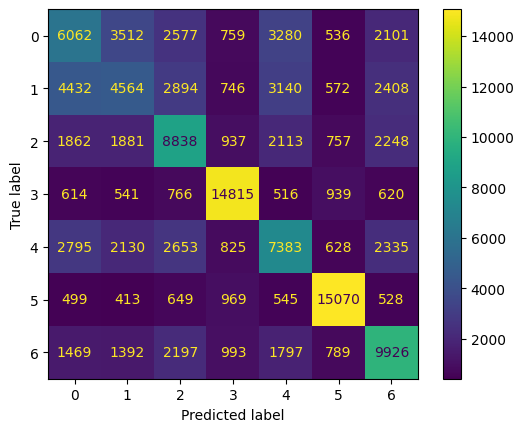

In [ ]:
model = random_search.best_estimator_
y_pred =  model.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
random_search.score(X_test, y_test)

0.5087814372400107

In [ ]:
random_search.score(X_train, y_train)

0.5958882413778628

In [ ]:
random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 33,
 'criterion': 'gini'}

### Bagging on Decision tree Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

              precision    recall  f1-score   support

           0       0.35      0.28      0.32     18827
           1       0.33      0.25      0.28     18756
           2       0.44      0.47      0.45     18636
           3       0.74      0.79      0.77     18811
           4       0.39      0.41      0.40     18749
           5       0.78      0.83      0.80     18673
           6       0.49      0.57      0.52     18563

    accuracy                           0.51    131015
   macro avg       0.50      0.51      0.51    131015
weighted avg       0.50      0.51      0.51    131015



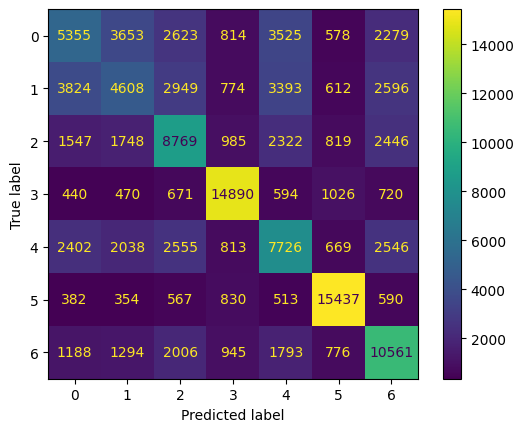

In [ ]:
bagging_clf = BaggingClassifier(estimator= dtc_clf, n_estimators = 100, random_state = 42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)